NBA Player Points Predictor

Seyi Oyesiku
https://www.basketball-reference.com/leagues/NBA_2022_per_game.html

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# First we get the data from the CSV file

data2122 = pd.read_csv("/content/data/2021-2022 NBA Data - Sheet1.csv")
data2021 = pd.read_csv("/content/data/2020-2021 NBA Data - Sheet1.csv")
data1920 = pd.read_csv("/content/data/2019-2020 NBA data - Sheet1.csv")
data1819 = pd.read_csv("/content/data/2018-2019 NBA Data - Sheet1.csv")
data1920.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,adamsst01
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,adebaba01
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,aldrila01
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,alexaky01
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,alexani01


In [ ]:
# Exploratory data analysis with Variation
import numpy as np
import scipy.stats

# Finding the mean points per game of 21-22 season
print(np.mean(data2122['PTS']))

# Print the median values of points per game from this dataset 21-22
print(np.percentile(data2122['PTS'], 50))

print(np.percentile(data2122['PTS'], [25, 75]))

7.81243842364532
6.3
[ 3.3 10.6]


In [ ]:
# standard deviation
# This EDA will be completed for each of the 4 years of data that we need to collect
# This can be applied to any of the stats shown in the dataset that we have acquired
print(np.std(data2122['PTS']))

6.134295938812177


To further explore our EDA, we will look at the top 5 NBA players for the 2021-2022 season so far, and create separate plots of each of those players. 
The player rankings were found from this article below. It details the best 20 players after the 2021-2022 NBA season. We will select 3 of these top 5 players to study their scoring patterns over the last few years. 
https://www.nbcsports.com/washington/wizards/2022-ranking-top-20-nba-players-right-now
Top 5:

Giannis Antetokounmpo

Stephen Curry

Joel Embiid

In [ ]:
def get_player_ppg(name, player_ppg):
    player_ppg['18-19'] = data1819.loc[data1819['Player'] == name, 'PTS'].item()
    player_ppg['19-20'] = data1920.loc[data1920['Player'] == name, 'PTS'].item()
    player_ppg['20-21'] = data2021.loc[data2021['Player'] == name, 'PTS'].item()
    player_ppg['21-22'] = data2122.loc[data2122['Player'] == name, 'PTS'].item()
    return player_ppg

# Giannis Antetokounmpo points per game
ga_ppg = {}
ga_ppg = get_player_ppg('Giannis Antetokounmpo', ga_ppg)
print(ga_ppg)

# Stephen Curry points per game
sc_ppg = {}
sc_ppg = get_player_ppg("Stephen Curry", sc_ppg)
print(sc_ppg)

# Joel Embiid points per game
je_ppg = {}
je_ppg = get_player_ppg("Joel Embiid", je_ppg)
print(je_ppg)


{'18-19': 27.7, '19-20': 29.5, '20-21': 28.1, '21-22': 29.9}
{'18-19': 27.3, '19-20': 20.8, '20-21': 32.0, '21-22': 25.5}
{'18-19': 27.5, '19-20': 23.0, '20-21': 28.5, '21-22': 30.6}


TypeError: ignored

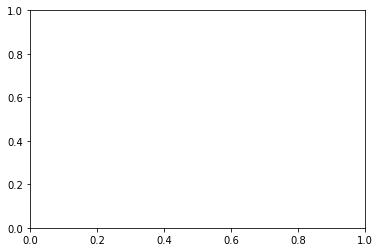

In [ ]:
# We will create plots of each player's points from 18-22
# Giannis Antetokounmpo Plot
plt.plot(ga_ppg.keys(), ga_ppg.values())
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

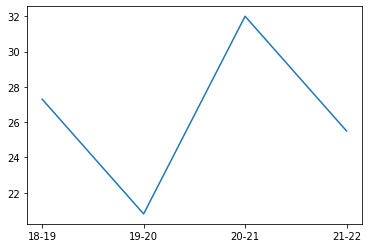

In [ ]:
# Stephen Curry plot
plt.plot(sc_ppg.keys(), sc_ppg.values())
plt.show

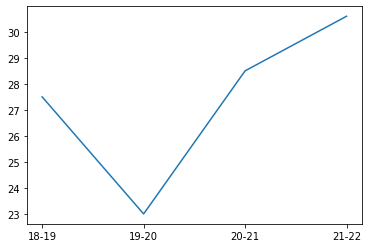

In [ ]:
# Joel Embiid Plot
plt.plot(je_ppg.keys(), je_ppg.values())
plt.show()

In [ ]:
data2122.hist(bins=50, figsize=(20,15))
plt.show()

KeyboardInterrupt: ignored

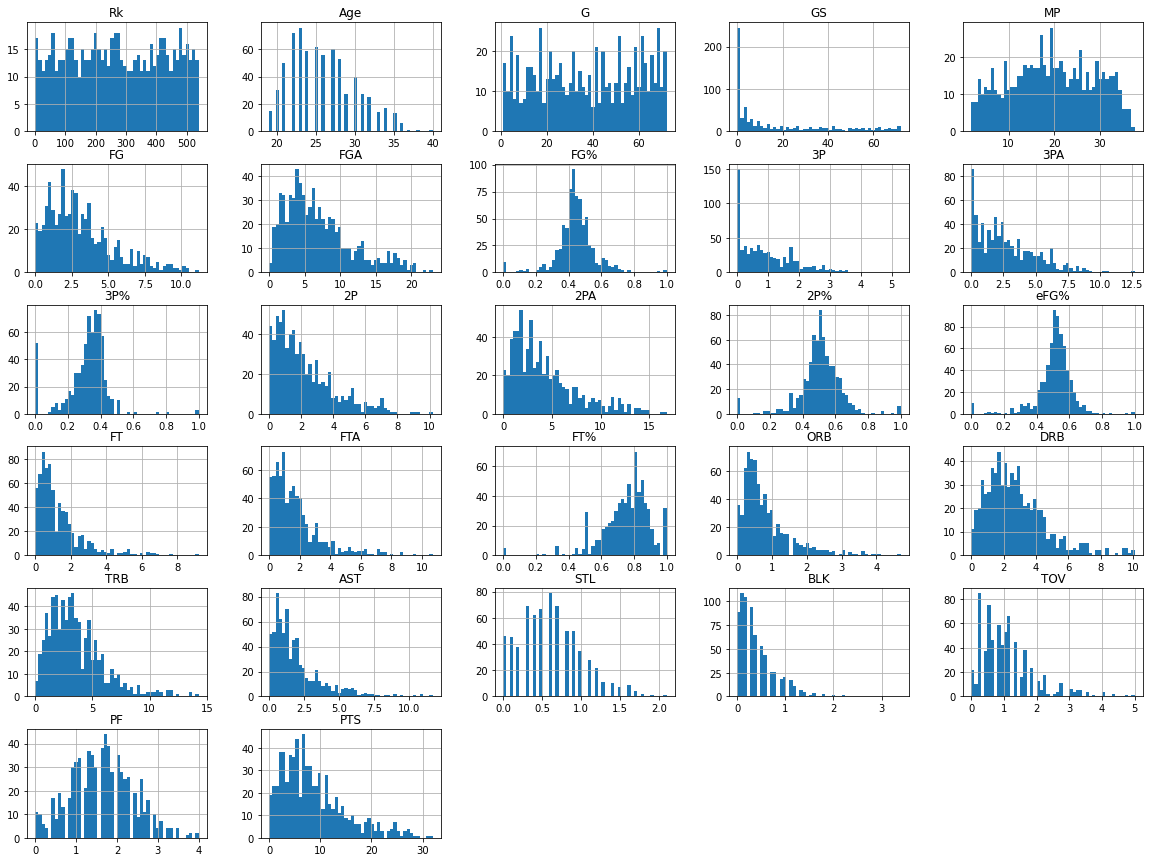

In [ ]:
data2021.hist(bins=50, figsize=(20,15))
plt.show()

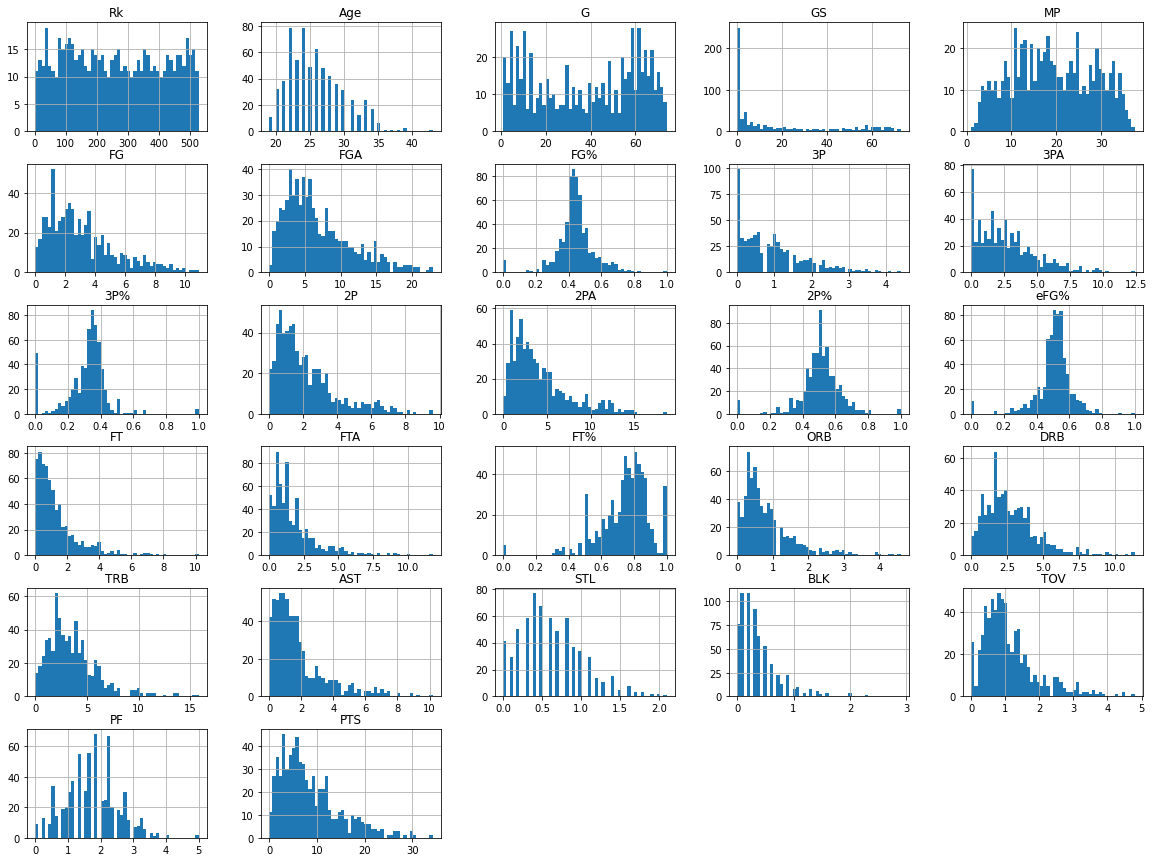

In [ ]:
data1920.hist(bins=50, figsize=(20,15))
plt.show()

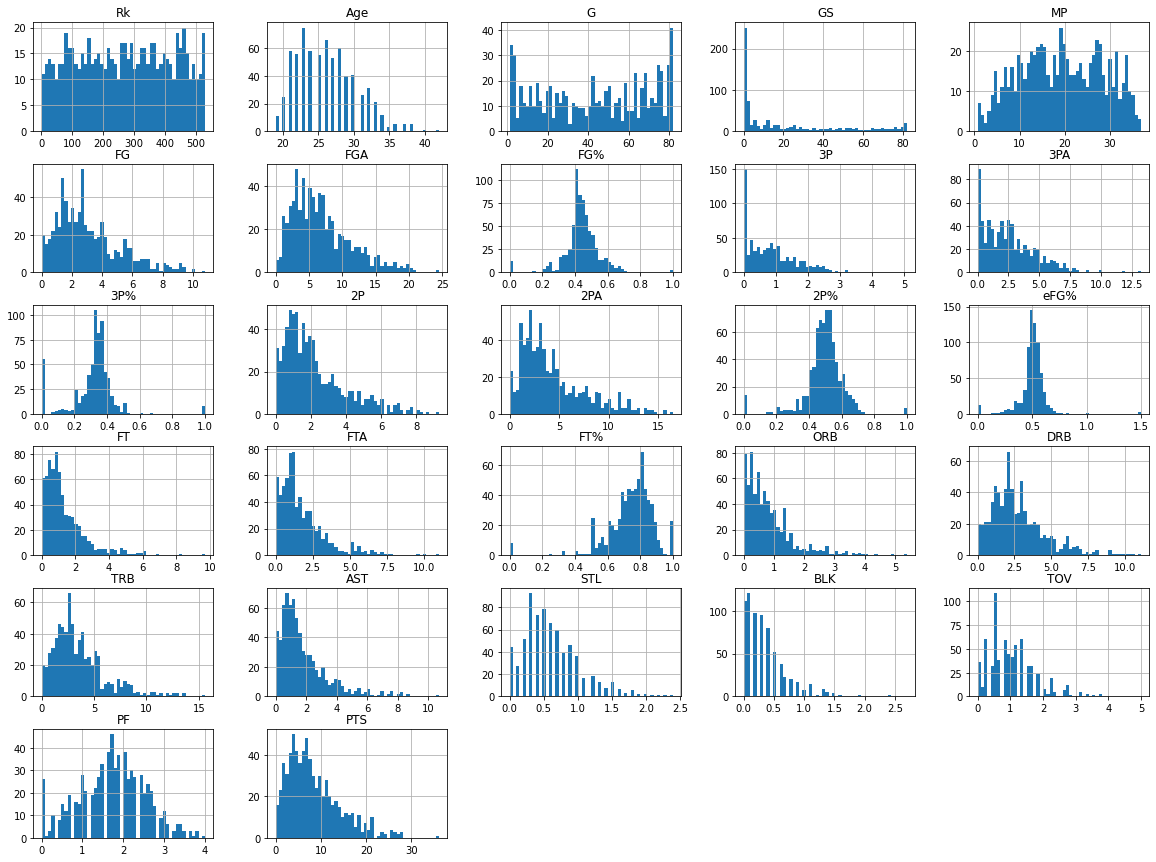

In [ ]:
data1819.hist(bins=50, figsize=(20,15))
plt.show()

The figures above show the distribution of each of the columns of data that we have. Of the features above, we will be trying to use the Minutes Played feature as the predictor for points per game. Since we have about 5 years' worth of data, we will be able to combine all of the columns that we need for analysis into one DataFrame to use to train our model. Our next step will be to find out what threshold for minutes played we should set in our dataset. 

A couple other features that could be used from this data are the field goals attempted and the free throws attempted because intuitively, a player who is able to take more shots per game and also more free throws per game would be able to score more. We will find out how much of an influence this feature has on predicting a player's points per game. 

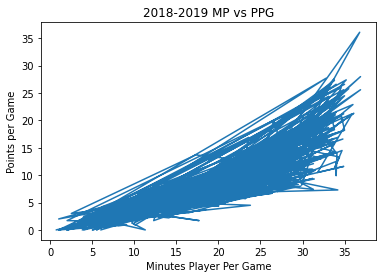

In [ ]:
# We will start by creating plots of the minutes played vs points per game for each year
plt.plot(data1819['MP'], data1819['PTS'])
plt.title("2018-2019 MP vs PPG")
plt.xlabel("Minutes Player Per Game")
plt.ylabel("Points per Game")
plt.show()

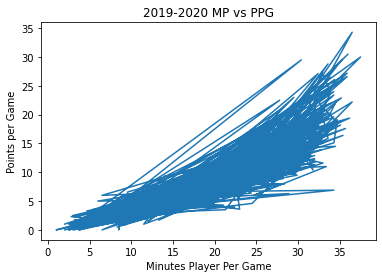

In [ ]:
plt.plot(data1920['MP'], data1920['PTS'])
plt.title("2019-2020 MP vs PPG")
plt.xlabel("Minutes Player Per Game")
plt.ylabel("Points per Game")
plt.show()

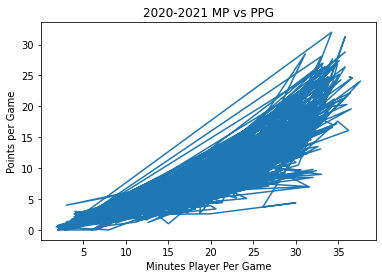

In [ ]:
plt.plot(data2021['MP'], data2021['PTS'])
plt.title("2020-2021 MP vs PPG")
plt.xlabel("Minutes Player Per Game")
plt.ylabel("Points per Game")
plt.show()

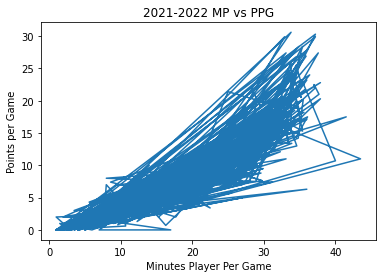

In [ ]:
plt.plot(data2122['MP'], data2122['PTS'])
plt.title("2021-2022 MP vs PPG")
plt.xlabel("Minutes Player Per Game")
plt.ylabel("Points per Game")
plt.show()

As we can see from the figures above, we can apply a linear regression model on this in order to understand how minutes player per game affects a player's points per game. A basketball game is 48 total minutes, so players who play less than half the game (24 mins or less) would just be considered role players on a team. Role players are players who are on a team to play only in certain situations. Because they are only used for certain specific purposes, we do not need them for our analysis since this model will predict the points per game of players who play in most situations in basketball games. We can set our threshold at 24 minutes per game because we only want to take into account players who play more than half the basketball game for their team. The players who play less than 24 minutes per game can be considered the role players that we will disregard. 

In [ ]:
# Instead of applying a binary classifcation algorithm, we will create masks to filter the data to only players who play more than 24 minutes per game. 
mask21 = [mp > 24.0 for mp in data2122["MP"]]
mask20 = [mp > 24.0 for mp in data2021["MP"]]
mask19 = [mp > 24.0 for mp in data1920["MP"]]
mask18 = [mp > 24.0 for mp in data1819["MP"]]
data2122 = data2122[mask21].copy()
data2021 = data2021[mask20].copy()
data1920 = data1920[mask19].copy()
data1819 = data1819[mask18].copy()
data1819

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9,adamsst01
7,8,LaMarcus Aldridge,C,33,SAS,81,81,33.2,8.4,16.3,...,3.1,6.1,9.2,2.4,0.5,1.3,1.8,2.2,21.3,aldrila01
10,11,Jarrett Allen,C,20,BRK,80,80,26.2,4.2,7.1,...,2.4,6.0,8.4,1.4,0.5,1.5,1.3,2.3,10.9,allenja01
12,13,Al-Farouq Aminu,PF,28,POR,81,81,28.3,3.2,7.3,...,1.4,6.1,7.5,1.3,0.8,0.4,0.9,1.8,9.4,aminual01
14,15,Kyle Anderson,SF,25,MEM,43,40,29.8,3.5,6.4,...,1.1,4.7,5.8,3.0,1.3,0.9,1.3,2.6,8.0,anderky01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,520,Justise Winslow,SF,22,MIA,66,52,29.7,4.9,11.3,...,1.0,4.4,5.4,4.3,1.1,0.3,2.2,2.7,12.6,winslju01
695,522,Delon Wright,PG,26,MEM,26,11,30.8,4.4,10.2,...,1.1,4.3,5.4,5.3,1.6,0.6,1.5,1.9,12.2,wrighde01
698,525,Thaddeus Young,PF,30,IND,81,81,30.7,5.5,10.4,...,2.4,4.1,6.5,2.5,1.5,0.4,1.5,2.4,12.6,youngth01
699,526,Trae Young,PG,20,ATL,81,81,30.9,6.5,15.5,...,0.8,2.9,3.7,8.1,0.9,0.2,3.8,1.7,19.1,youngtr01


In [ ]:
# Now we can combine all the relevant columns from each year into one DataFrame for our analysis
df = pd.DataFrame()
def gather_values(df, feature):
    values = []
    for value in data1819[feature]:
        values.append(value)
    
    for value in data1920[feature]:
        values.append(value)
    
    for value in data2021[feature]:
        values.append(value)
        
    for value in data2122[feature]:
        values.append(value)
    df[feature] = values
    return df

df = gather_values(df, "MP")
df = gather_values(df, "FGA")
df = gather_values(df, "FG%")
df = gather_values(df, "FTA")
df = gather_values(df, "FT%")
df = gather_values(df, "PTS")
df = gather_values(df, "Player")
df
# This DataFrame has data in order from 2018-2022

,MP,FGA,FG%,FTA,FT%,PTS,Player
0,33.4,10.1,0.595,3.7,0.500,13.9,Steven Adams
1,33.2,16.3,0.519,5.1,0.847,21.3,LaMarcus Aldridge
2,26.2,7.1,0.590,3.5,0.709,10.9,Jarrett Allen
3,28.3,7.3,0.433,2.1,0.867,9.4,Al-Farouq Aminu
4,29.8,6.4,0.543,1.5,0.578,8.0,Kyle Anderson
...,...,...,...,...,...,...,...
927,29.6,6.0,0.736,1.5,0.722,10.0,Robert Williams
928,26.8,10.5,0.405,2.3,0.560,10.7,Justise Winslow
929,30.8,12.9,0.501,4.9,0.623,17.9,Christian Wood
930,34.9,20.3,0.460,7.3,0.904,28.4,Trae Young


We have now applied a binary classification algorithm with just the mask. We filtered all of our data to just the players who playe above 24 minutes, with the justification detailed above. We need to now look at each of our features to determine what their effect on our players' points per game would be. We have already plotted all of the minutes played column with the points per game, so we will create plots of the other two features we are using. 

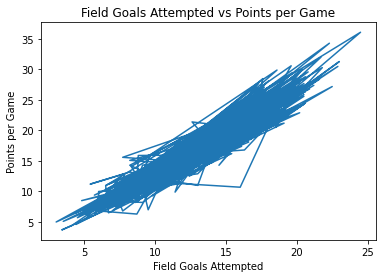

In [ ]:
# Plotting the Field Goals Attempted vs the Points per Game
plt.plot(df['FGA'], df['PTS'])
plt.title("Field Goals Attempted vs Points per Game")
plt.xlabel("Field Goals Attempted")
plt.ylabel("Points per Game")
plt.show()

We can see from this figure above that the field goals attempted is directly related to the points per game of each player. This makes sense because the more shots that any player attempts, this player would most likely score more points. We should get some good results from our linear regression since this curve seems quite linear. 

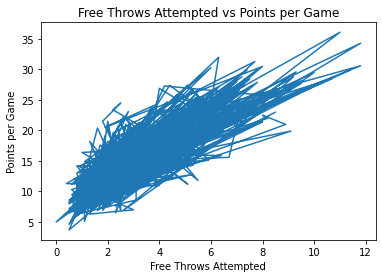

In [ ]:
# Plotting the Free Throws Attempted vs Points per Game
plt.plot(df['FTA'], df['PTS'])
plt.title("Free Throws Attempted vs Points per Game")
plt.xlabel("Free Throws Attempted")
plt.ylabel("Points per Game")
plt.show()

This curve does not seem as linear as the FGA vs Points figure. However, it should still work for our analysis with the linear regression. We just may not have as accurate of a fit as we probably will with the FGA values. 

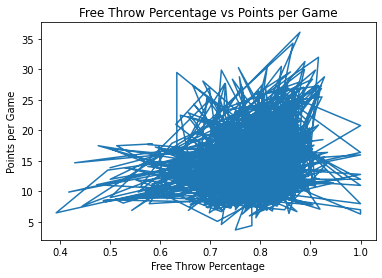

In [ ]:
# Plotting the Free Throw Percentage vs Points per Game
plt.plot(df['FT%'], df['PTS'])
plt.title("Free Throw Percentage vs Points per Game")
plt.xlabel("Free Throw Percentage")
plt.ylabel("Points per Game")
plt.show()

Free Throw Percentage shows how efficiently a player is able to score his points per game at the Free Throw Line. This should be a good predictor for points per game of each NBA player in our dataset. 

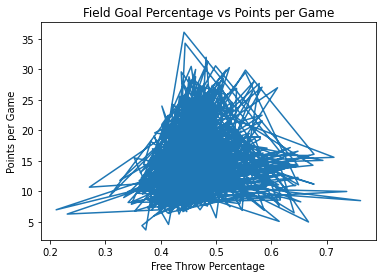

In [ ]:
# Plotting the Field Goal Percentage vs Points per Game
plt.plot(df['FG%'], df['PTS'])
plt.title("Field Goal Percentage vs Points per Game")
plt.xlabel("Free Throw Percentage")
plt.ylabel("Points per Game")
plt.show()

In [ ]:
df_num = df.drop("Player", axis=1)
df_num

,MP,FGA,FG%,FTA,FT%,PTS
0,33.4,10.1,0.595,3.7,0.500,13.9
1,33.2,16.3,0.519,5.1,0.847,21.3
2,26.2,7.1,0.590,3.5,0.709,10.9
3,28.3,7.3,0.433,2.1,0.867,9.4
4,29.8,6.4,0.543,1.5,0.578,8.0
...,...,...,...,...,...,...
927,29.6,6.0,0.736,1.5,0.722,10.0
928,26.8,10.5,0.405,2.3,0.560,10.7
929,30.8,12.9,0.501,4.9,0.623,17.9
930,34.9,20.3,0.460,7.3,0.904,28.4


The field goal percentage shows efficiently a player is able to score his points off every shot in the game other than a free throw. This should be useful for our analysis, even though the relationship is not entirely linear. 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Since we have some NaN values in our dataset, we will try to impute with the median values
imputer = SimpleImputer(strategy='median')
imputer.fit(df_num)
X = imputer.transform(df_num)
df_tr = pd.DataFrame(X, columns=df_num.columns, index = df_num.index)

pts = []
for pt in df_tr['PTS']:
    pts.append(pt)

df_tr = df_tr.drop('PTS', axis=1)

# Split the data into train and test set and build the pipeline
x_train, x_test, y_train, y_test = train_test_split(df_tr, pts, test_size=0.2, random_state=0)


pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')), 
                    ('std_scaler', StandardScaler())])
df_prepared = pipeline.fit_transform(df_num)


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
predictions = lin_reg.predict(df_tr)
predictions.size

932

In [ ]:
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Now we evaluate how well our model did
linreg_mse = mean_squared_error(pts, predictions)
linreg_rmse = np.sqrt(linreg_mse)

linreg_mae = mean_absolute_error(pts, predictions)
print(linreg_rmse, linreg_mae)


0.7374732737365233 0.5561444682650989


It seems that our linear regression model was actually quite accurate when predicting the points per game values. We see that the RMSE value is 0.737, which is close to 0. Since we know that the lower the RMSE value, the better the model was able to predict our points per game, we know that this model worked well. This is the same case with the mean absolute error. 

The next model that we will consider for this project is K-Nearest Neighbors Regressor. The advantage of this method is we would not lose any information, and we would be able to train quickly. In addition, since we only have 5 features we are using to predict points per game, this model should work well for us since it works well for models with less than 20 features. 

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# In order to find the ideal k-value for this, we will attempt a range of neighbor values
# from 3-7 
rsquared = []
for i in range(3, 8):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train, y_train)
    knn.predict(x_test)
    rsquared.append(knn.score(x_test, y_test))

for i in range(5):
    print(rsquared[i])


0.9218715651794414
0.9252362814563048
0.9251528171921358
0.9240764928681993
0.9229777996670361


All of these R^2 values are quite close to 1, so it seems that if we choose to use 4 neighbors, we will have the best fit. 

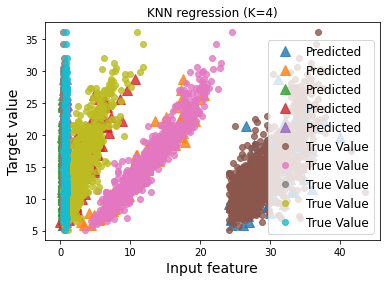

In [ ]:
knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
plt.plot(x_test, y_pred, "^", markersize = 10, label='Predicted', alpha=0.8)
plt.plot(x_train, y_train, 'o', label="True Value", alpha=0.8)
plt.xlabel('Input feature', fontsize=14)
plt.ylabel('Target value', fontsize=14)
plt.title('KNN regression (K=4)')
plt.legend(fontsize=12)

Based on the plot above, it seems that because of the high R^2 value, in addition to seeing how close the predicted points are to each true value, we know that this K-Nearest Neighbors model worked well for us. 

Intended Algorithms

For this project, we will have to work with players who play above a certain threshold of minutes per game, and also these players must appear in all four of our datasets. We will implement a binary classification algorithm with this criteria to decide what players we will use to train our model. Fortunately, we should be able to just create a mask for the dataset for us to decide what points in the data to keep. 

We will be using linear regression with the minutes played plotted against the points per game for each player of interest. We will start by comparing the four datasets to find out which players across all four of these datasets saw the greatest increase in minutes played per game. Of course, we will only consider players who have been in the league for all four years. Then, we will have to select players who have seen the greatest increase in playing time over the four years. This way, we can train the model to predict how many points per game these players will have this season based on their playing time for this season. 

Unsupervised feature selection may also be useful for us because there are stats such as rebounds per game, assists, blocks and turnovers that may not have much of an effect of a player's points per game. We can make decisions on what stats we would keep in our dataset in order to create the model. We can also examine the covariance between these stats such as Offensive and Defensive rebounds that are correlated with the Total rebounds of a player. Free throw percentage, free throw attempts, field goal percentage, and field goal attempts per game are also features that are related to each other. 


References
https://medium.com/@michaelliu36/what-makes-a-player-score-nba-ppg-predictions-from-a-college-data-scientist-3086f9fbb23
https://www.nbcsports.com/washington/wizards/2022-ranking-top-20-nba-players-right-now

In [ ]:
#Random forest 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data2122 = pd.read_csv("/content/data/2021-2022 NBA Data - Sheet1.csv")
data2021 = pd.read_csv("/content/data/2020-2021 NBA Data - Sheet1.csv")
data1920 = pd.read_csv("/content/data/2019-2020 NBA data - Sheet1.csv")
data1819 = pd.read_csv("/content/data/2018-2019 NBA Data - Sheet1.csv")
data2021.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Player-additional
0,1,Precious Achiuwa,PF,21,MIA,61,4,12.1,2.0,3.7,...,1.2,2.2,3.4,0.5,0.3,0.5,0.7,1.5,5.0,achiupr01
1,2,Jaylen Adams,PG,24,MIL,7,0,2.6,0.1,1.1,...,0.0,0.4,0.4,0.3,0.0,0.0,0.0,0.1,0.3,adamsja01
2,3,Steven Adams,C,27,NOP,58,58,27.7,3.3,5.3,...,3.7,5.2,8.9,1.9,0.9,0.7,1.3,1.9,7.6,adamsst01
3,4,Bam Adebayo,C,23,MIA,64,64,33.5,7.1,12.5,...,2.2,6.7,9.0,5.4,1.2,1.0,2.6,2.3,18.7,adebaba01
4,5,LaMarcus Aldridge,C,35,TOT,26,23,25.9,5.4,11.4,...,0.7,3.8,4.5,1.9,0.4,1.1,1.0,1.8,13.5,aldrila01


In [ ]:
train = pd.read_csv("/content/data/2021-2022 NBA Data - Sheet1.csv")
train = pd.read_csv("/content/data/2020-2021 NBA Data - Sheet1.csv")
train = pd.read_csv("/content/data/2019-2020 NBA data - Sheet1.csv")
train = pd.read_csv("/content/data/2018-2019 NBA Data - Sheet1.csv")
print(train.shape)

(708, 31)


In [ ]:
#checking for missing data
NAs = pd.concat([train.isnull().sum()], axis=1, keys=["Train"])
NAs[NAs.sum(axis=1) > 0]

,Train
FG%,6
3P%,47
2P%,15
eFG%,6
FT%,43


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, random_state=1, min_samples_split=5)
mean_ap, aps, all_predictions = backtest(stats, rf, years[5:], predictors)

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25)


NameError: ignored

In [ ]:
from sklearn import  ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)
rf_clf.score(x_test, y_test)

ValueError: ignored

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

ValueError: ignored